In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [83]:
#Import Data

df = pd.read_csv('/content/data/placement.csv')

In [84]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [86]:
df = df.iloc[:,1:]

In [87]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


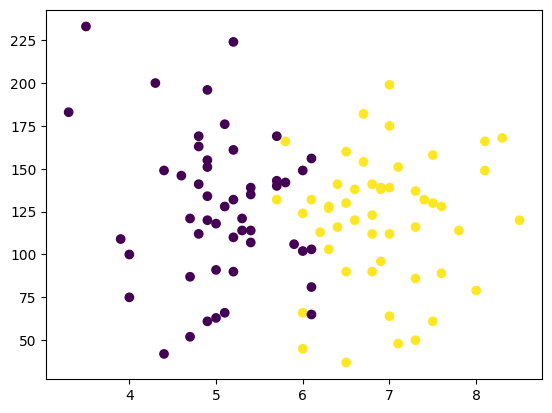

In [88]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [89]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [90]:
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [91]:
y.head()

,placement
0,1
1,0
2,0
3,1
4,0


In [92]:
# splitting data (train 80%, test 20%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [93]:
X_train

,cgpa,iq
44,7.5,61.0
30,7.6,128.0
82,6.5,37.0
47,5.2,161.0
25,5.0,91.0
...,...,...
13,6.4,116.0
14,6.1,103.0
1,5.9,106.0
74,6.7,154.0


In [94]:
y_train

,placement
44,1
30,1
82,1
47,0
25,0
...,...
13,1
14,0
1,0
74,1


In [95]:
# scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [96]:
X_train_scaled

array([[ 1.41601022e+00, -1.61719417e+00],
       [ 1.50803363e+00,  1.89802025e-01],
       [ 4.95776122e-01, -2.26447639e+00],
       [-7.00528210e-01,  1.07981508e+00],
       [-8.84575030e-01, -8.08091394e-01],
       [ 7.71846353e-01,  5.49515633e-02],
       [-8.84575030e-01, -1.56325398e+00],
       [ 5.87799532e-01, -2.59587140e-02],
       [-7.00528210e-01, -2.95659638e-01],
       [ 1.27682482e-01, -1.07779232e+00],
       [ 9.55893173e-01,  2.10467859e+00],
       [ 4.03752712e-01,  5.40413227e-01],
       [-1.43671549e+00,  7.56173966e-01],
       [-5.16481390e-01, -3.76569915e-01],
       [-1.16064526e+00,  1.01137847e-03],
       [ 6.79822943e-01,  1.64618702e+00],
       [ 3.11729302e-01,  1.89802025e-01],
       [-1.25266867e+00,  6.75263689e-01],
       [-1.06862185e+00,  5.40413227e-01],
       [-2.40411159e-01,  5.13443135e-01],
       [-6.08504800e-01, -1.87779269e-01],
       [-5.16481390e-01,  4.86473042e-01],
       [ 5.87799532e-01,  4.59502950e-01],
       [-9.

In [97]:
# model training
clf = LogisticRegression()
clf.fit(X_train_scaled,y_train)

LogisticRegression()

In [98]:
# model prediction on test data
y_pred = clf.predict(X_test_scaled)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [99]:
# actual test data
y_test

,placement
64,1
23,0
38,1
84,0
15,0
80,0
94,0
65,1
50,0
85,1


In [100]:
# model accuracy
accuracy_score(y_test,y_pred)

0.95

<Axes: >

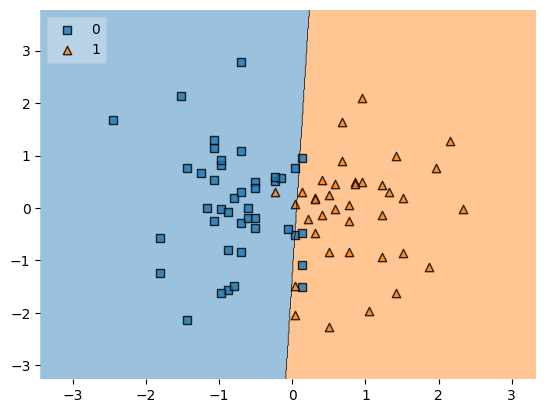

In [101]:
# model decision boundry
plot_decision_regions(X_train_scaled, y_train.values,clf=clf, legend=2)